In [ ]:
%matplotlib inline

# Assignment 1

**DUE: Monday, January 23rd 2023 at 5:00pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. To do so, restart the kernel and run all cells (in the menubar, select Runtime→→Restart and run all).
#### Show your work!
Whenever you are asked to find the solution to a problem, be sure to also **show how you arrived** at your answer.

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWERS HERE", as well as your name below:



In [ ]:
NAME = "Nayan Sanjay Bhatia"
STUDENT_ID = "1926648"

## Problem 1

![figure](https://docs.google.com/drawings/d/e/2PACX-1vR3cNeZWfHNbPXRGyZrKazhI2WNM9wroJoAsshbD7LzwEBd4k0W_zu-T30_O_4iHC2qpKRxCRBA1IjV/pub?w=480&h=320)

Which solution would the following search algorithms find to move from node *Start* to node *Goal* if run the algorithm on the search graph above? Break any ties alphabetically.

a. Breadth-First Search

b. Depth-First Search

c. Uniform Cost Search

Explain by drawing an equivalent search tree for each of them. Draw the search trees graphically. A good way to do this is through [Google Drawings](https://docs.google.com/drawings)

[YOUR ANSWERS HERE]

a. Start − d - Goal

b. Start − a − b − c - Goal

c. Start − a − b − Goal

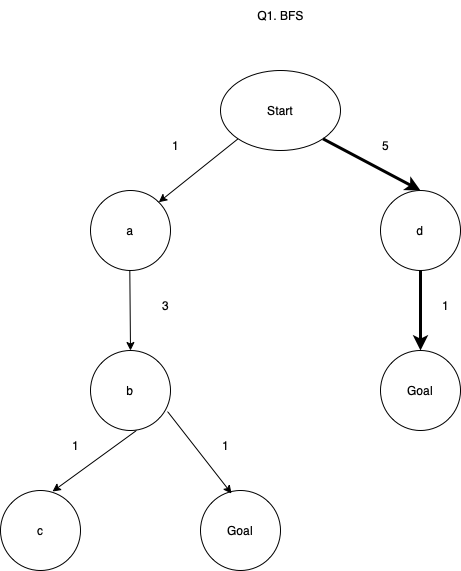

In [93]:
from IPython.display import Image
Image(filename='/content/1q1_bfs.png') 

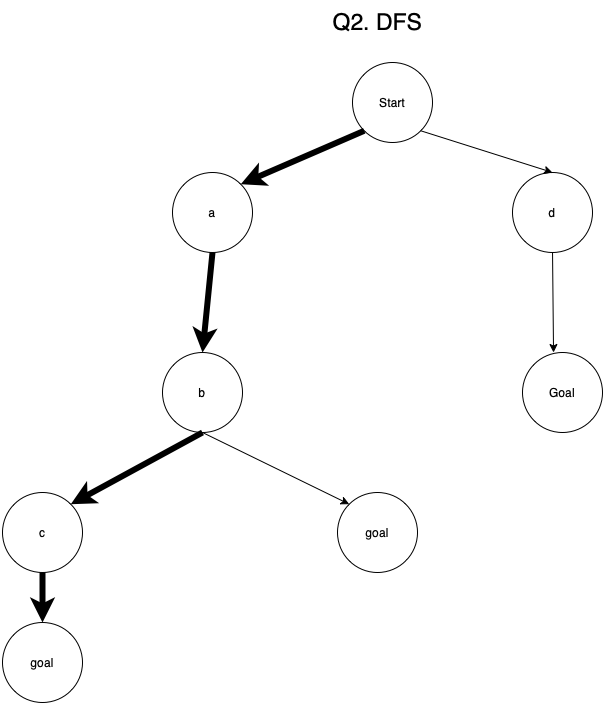

In [94]:
Image(filename='/content/1q2_DFS.drawio.png')

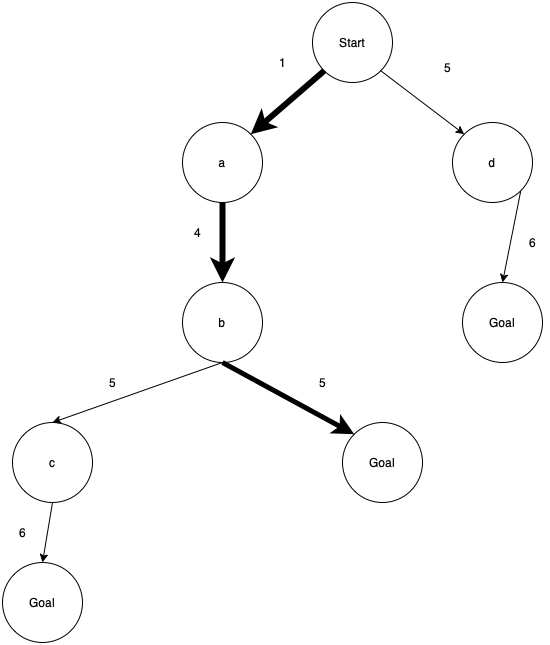

In [95]:
Image(filename='/content/1q3_Uniform_Cost_search.drawio.png')

## Problem 2
Answer the following questions about the search problem shown in the figure below. Break any ties alphabetically. For the questions that ask for a path, please give your answers in a form similar to this example, 

Start − a − d − Goal

![figure](https://docs.google.com/drawings/d/e/2PACX-1vS4nUoOVGzXNZTHZLsY6wZ6VyjtPlA4mhcvWs-6mgwaeDwoMftqbYyytgBVmgOnqLoUGZbRt8cuQNfA/pub?w=640&h=480)

What path would be returned for this search problem using each of the following graph search algorithms?

a. Breadth-First Search

b. Uniform Cost Search

c. Depth-First Search

d. A* Search (using an appropriate heuristic function). Explain what heuristc function you used.



Consider the heuristics for this problem shown in the table below.

|     State     |     h1     |     h2        |
|---------------|------------|---------------|
|     start     |     5      |     4         |
|     a         |     3      |     2         |
|     b         |     6      |     6         |
|     c         |     2      |     1         |
|     d         |     3      |     3         |
|     goal      |     0      |     0         |


e. Is h1 consistent?

f. Is h2 consistent?

[YOUR ANSWERS HERE]

a. Start - Goal

b. Start - a - c - Goal

c. Start - a - b - d - Goal

d. Start - a - c - Goal. Used the h1 heuristic function. 

e. h1 is not consistent

f. h2 is not consistent


##Problem 3

![graph](https://docs.google.com/drawings/d/e/2PACX-1vStncj9Nc0LddQeViaYnykNxEZsJoYJMHhub2LLX8s7k7gwYjlnlt0cCcivymFihiZyOOMtHwzk1Z4G/pub?w=480&amp;h=320)

Find the order of visited nodes of the given graph above using both Breadth-first Search (BFS) (Textbook Section 3.4.1) and Depth-First Search (DFS) (Textbook Section 3.4.3).

A Node class is given to you for creating the graph.

**NOTE:**
 - If two nodes are considered equally good chocices, take the node with the lower ID first. 
 - Do not revisit already explored nodes when implementing the DFS algorithm.



In [1]:
class Node:
    """
    This class describes a single node contained within a graph. 
    It has the following instannce level attributes:
    
    ID: An integer id for the node i.e. 1
    """    
    def __init__(self, ID):
        self.ID = ID
        self.connected_nodes = []
        
    def __repr__(self):
        ID = self.ID
        if len(self.connected_nodes)==0:
            nodes = 'None'
        else:
            nodes = ','.join(str(cn[1].ID) for cn in self.connected_nodes)
        return '\nNode:{}\nConnected Nodes:{}'.format(ID, nodes)
        
    def set_connected_nodes(self,connected_nodes):
        """
        Adds edges that lead from this node to other nodes:
        
        Parameters:
        - connected_nodes: A list of tuples consisting of (cost, Node), 
                           where 'cost' is a floating point value 
                           indicating the cost to get from this node 
                           to 'Node' and 'Node' is a Node object
        """
        self.connected_nodes = connected_nodes
    
def build_graph():
    """
    Builds the graph to be parsed by the search algorithms.
    Returns: All nodes with connectivity in the graph
    """
    ids = range(13)
    coords = [(0,0), (1,1), (1,0), (1,1), (5,2), (3,1), (3,0), 
              (3,-1), (5,1), (4,1), (4,0), (4,-2), (7,0)]
    
    #https://en.wikipedia.org/wiki/Euclidean_distance
    euclidean_distance = lambda x1y1, x2y2: ((x1y1[0]-x2y2[0])**2 +  (x1y1[1]-x2y2[1])**2)**(0.5)
    
    def build_connected_node_list(from_id, to_ids):
        starting_coords = coords[from_id]
        
        connected_nodes = []
        for to_id in to_ids:
            connected_nodes.append((euclidean_distance(starting_coords, coords[to_id]), all_nodes[to_id]))
            
        return connected_nodes
    
    goal_coords = (7,0)
    all_nodes = [Node(_id) for _id in ids]
    
    all_nodes[8].set_connected_nodes(build_connected_node_list(8, [12]))
    all_nodes[10].set_connected_nodes(build_connected_node_list(10,[12]))
    all_nodes[5].set_connected_nodes(build_connected_node_list(5, [8]))
    all_nodes[6].set_connected_nodes(build_connected_node_list(6, [9, 10]))
    all_nodes[7].set_connected_nodes(build_connected_node_list(7, [11]))
    all_nodes[1].set_connected_nodes(build_connected_node_list(1, [4,5]))
    all_nodes[2].set_connected_nodes(build_connected_node_list(2, [5,6]))
    all_nodes[3].set_connected_nodes(build_connected_node_list(3, [7]))
    all_nodes[0].set_connected_nodes(build_connected_node_list(0, [1,2,3]))
    
    return all_nodes

In [2]:
# The starting node. You can use this cell to familiarize
# yourself with the node/graph structure
build_graph()

[
 Node:0
 Connected Nodes:1,2,3, 
 Node:1
 Connected Nodes:4,5, 
 Node:2
 Connected Nodes:5,6, 
 Node:3
 Connected Nodes:7, 
 Node:4
 Connected Nodes:None, 
 Node:5
 Connected Nodes:8, 
 Node:6
 Connected Nodes:9,10, 
 Node:7
 Connected Nodes:11, 
 Node:8
 Connected Nodes:12, 
 Node:9
 Connected Nodes:None, 
 Node:10
 Connected Nodes:12, 
 Node:11
 Connected Nodes:None, 
 Node:12
 Connected Nodes:None]

In [49]:
def BFS(starting_node, goal_node):
    """
    This function implements the breath first search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited nodes in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []


    queue = []
    queue.append(starting_node) #initialise the queue with the root node

    visited_nodes_in_order.append(starting_node.ID)

    

    while len(queue)!=0: #iterate till the queue is not empty
        current = queue.pop(0)
    
        for neighbor in current.connected_nodes:
            
            if neighbor[1].ID not in visited_nodes_in_order:
                queue.append(neighbor[1])
                visited_nodes_in_order.append(neighbor[1].ID)
            if  neighbor[1].ID == goal_node:
                return visited_nodes_in_order

 

    return visited_nodes_in_order

def DFS(starting_node, goal_node):
    """
    This function implements the depth first search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited nodes in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []
    stack = []
    stack.append(starting_node)
    
    while len(stack)!=0:

        current = stack.pop()

        if type(current) == type(starting_node):
            currentID = current.ID
            neighbors = current.connected_nodes
        if type(current) != type(starting_node):
            currentID = current[1].ID
            neighbors = current[1].connected_nodes
            weight = current[0]

            
        if currentID == goal_node:
            visited_nodes_in_order.append(currentID)
            return visited_nodes_in_order
        if currentID not in visited_nodes_in_order:
            visited_nodes_in_order.append(currentID)
        

        for neighbour in neighbors[::-1]:
            stack.append(neighbour)


    
    return visited_nodes_in_order

In [50]:
goal_node = 12

print(BFS(build_graph()[0], goal_node))

print(DFS(build_graph()[0], goal_node))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 4, 5, 8, 12]


## Problem 4

For the same graph from **Problem 3**, implement the **A* Search** (Textbook Section 3.5.2) algorithm.

A modified Node class similar to the Node class from **Problem 3** is given to create the graph. 
Here is  the pseudo code from the book for A* Search.

#### A* Search
---
The most widely known form of best-first search is called **A∗ search** (pronounced "A-star search"). It evaluates nodes by combining $g(n)$, the cost to reach the node, and $h(n)$, the cost to get from the node to the goal:

\begin{equation*}
f(n) = g(n) + h(n) .
\end{equation*}

Since $g(n)$ gives the path cost from the start node to node $n$, and $h(n)$ is the estimated cost of the cheapest path from n to the goal, we have


$f(n)$= estimated cost of the cheapest solution through $n$ .

**NOTE:**
- If two nodes are considered equally good choices, take the node with the lower ID first. 


In [51]:
class Node:
    """
    This class describes a single node contained within a graph. 
    It has the following instannce level attributes:
    
    ID: An integer id for the node i.e. 1
    heuristic_cost: A float value representing the estimated 
                    cost to the goal node
    """    
    def __init__(self, ID, heuristic_cost):
        self.ID = ID
        self.connected_nodes = []
        self.heuristic_cost = heuristic_cost
        
    def __repr__(self):
        ID = self.ID
        hx = self.heuristic_cost
        if len(self.connected_nodes)==0:
            nodes = 'None'
        else:
            nodes = ','.join(str(cn[1].ID) for cn in self.connected_nodes)
        return 'Node:{}\nh(n):{}\nConnected Nodes:{}'.format(ID, hx, nodes)
        
    def set_connected_nodes(self,connected_nodes):
        """
        Adds edges that lead from this node to other nodes:
        
        Parameters:
        - connected_nodes: A list of tuples consisting of (cost, Node), 
                           where 'cost' is a floating point value 
                           indicating the cost to get from this node 
                           to 'Node' and 'Node' is a Node object
        """
        self.connected_nodes = connected_nodes
    
def build_graph():
    """
    Builds the graph to be parsed by the search algorithms.
    Returns: The starting node, which is the entry point into the graph
    """
    ids = range(13)
    coords = [(0,0), (1,1), (1,0), (1,1), (5,2), (3,1), (3,0), 
              (3,-1), (5,1), (4,1), (4,0), (4,-2), (7,0)]
    
    #https://en.wikipedia.org/wiki/Euclidean_distance
    euclidean_distance = lambda x1y1, x2y2: ((x1y1[0]-x2y2[0])**2 +  (x1y1[1]-x2y2[1])**2)**(0.5)
    
    def build_connected_node_list(from_id, to_ids):
        starting_coords = coords[from_id]
        
        connected_nodes = []
        for to_id in to_ids:
            connected_nodes.append((euclidean_distance(starting_coords, coords[to_id]), all_nodes[to_id]))
            
        return connected_nodes
    
    goal_coords = (7,0)
    all_nodes = [Node(_id, euclidean_distance(coord, goal_coords)) for _id, coord in zip(ids, coords)]
    
    all_nodes[8].set_connected_nodes(build_connected_node_list(8, [12]))
    all_nodes[10].set_connected_nodes(build_connected_node_list(10,[12]))
    all_nodes[5].set_connected_nodes(build_connected_node_list(5, [8]))
    all_nodes[6].set_connected_nodes(build_connected_node_list(6, [9, 10]))
    all_nodes[7].set_connected_nodes(build_connected_node_list(7, [11]))
    all_nodes[1].set_connected_nodes(build_connected_node_list(1, [4,5]))
    all_nodes[2].set_connected_nodes(build_connected_node_list(2, [5,6]))
    all_nodes[3].set_connected_nodes(build_connected_node_list(3, [7]))
    all_nodes[0].set_connected_nodes(build_connected_node_list(0, [1,2,3]))
    
    return all_nodes[0]

In [52]:
# The starting node. You can use this cell to familiarize
# yourself with the node/graph structure
build_graph()

Node:0
h(n):7.0
Connected Nodes:1,2,3

In [91]:
#referred from: https://stackabuse.com/basic-ai-concepts-a-search-algorithm/
def a_star_search(starting_node, goal_node):
    """
    This function implements the A* search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited node ids in order they were visited with starting node
    always being the first node and the goal node always being the last
    """

    visited_nodes_in_order = []
    node_visited = []

    cost_dict = {}
    cost_dict[starting_node] = 0

    mapping = {}
    mapping[starting_node] = starting_node

    nodes = []
    nodes.append(starting_node)

    while len(nodes)!=0:
        temp = None

        for node in nodes:
            
            if temp == None or cost_dict[node]+ node.heuristic_cost < cost_dict[temp]+ temp.heuristic_cost:
                temp = node
        if not temp:
            return -1
        
        if temp.ID == goal_node:
            while mapping[temp]!=temp:
                visited_nodes_in_order.append(temp.ID)
                temp = mapping[temp]
            visited_nodes_in_order.append(starting_node.ID)
            visited_nodes_in_order=visited_nodes_in_order[::-1]
            return visited_nodes_in_order
        
        for conected_node in temp.connected_nodes:

            if conected_node == starting_node:
                weight=0
                
            
            if conected_node != starting_node:
                weight = conected_node[0]
                conected_node=conected_node[1]
            if conected_node not in nodes and conected_node not in node_visited:
                nodes.append(conected_node)
                mapping[conected_node] = temp
                cost_dict[conected_node] = cost_dict[temp]+weight
            else:
                if cost_dict[conected_node]>cost_dict[temp]+weight:
                    cost_dict[conected_node] = [temp]+weight
                    mapping[conected_node] = temp
                    if conected_node in node_visited:
                        node_visited.remove(conected_node)
                        nodes.append(conected_node)
                    
        nodes.remove(temp)
        node_visited.append(temp)

 
    
    return visited_nodes_in_order


In [92]:
goal_node = 12

a_star_search_answer = [0, 2, 6, 10, 12]

assert a_star_search(build_graph(), goal_node)==a_star_search_answer

## Problem 5

**Question 3.8 of the textbook**: In section 3.1 we made an assumption that edge costs are all non-negative and therefore we would not consider problems with negative path costs.

a. Suppose that actions can have arbitrarily large negative costs; explain why this possibility would force any optimal algorithm to explore the entire state space.

b. Does it help if we insist that step costs must be greater than or equal to some negative constant c? Consider both trees and graphs.

c. Suppose that a set of actions forms a loop in the state space such that executing the set in some order results in no net change to the state. If all of these actions have negative cost, what does this imply about the optimal behavior for an agent in such an environment?

d. One can easily imagine actions with high negative cost, even in domains such as route finding. For example, some stretches of road might have such beautiful scenery as to far outweigh the normal costs in terms of time and fuel. Explain, in precise terms, within the context of state-space search, why humans do not drive around scenic loops indefinitely, and explain how to define the state space and actions for route finding so that artificial agents can also avoid looping.

e. Can you think of a real domain in which step costs are such as to cause looping?


YOUR ANSWERS HERE

a. Negative costs are difficult to handle. Looping the negative cost again and again can reduce the cost at each iteration. Because of negative cost, you can have a path that can be better than the previous better alternative consisting of only positive weights. Hence, to consider the case which involves having the negative edge, we have to make sure the most optimal algorithm searches the entire state space.

b. In case of graphs, if there is a cycle, it can be stuck in an infinite loop since it will keep traversing to reduce the cost (like the romania example discussed in the class). For trees, it can be helpful since we have the visited and unvisited nodes and no chance of the agent stuck in the loop. 

c. Since the agent is stuck in an infinite loop with negatie cycle, every cycle will produce a new optimal path. 

d. The human might get bored because of the monotony? As discussed in the guest lecture, we can enforce certain liberty for the scenic route. after a fix interval( imposing time and money restriction), we can make sure the human does not get stuck in the beautiful scenario and figures out its actual goal

e. Drinking salt water to quench the thrist. salt water makes the person more thristing hence causing infinite loop.